## 비닝(Binning): 데이터를 구간이나 순위에 따라서 범주화하는 것
### 수학 0-100점, 상/중/하, 100-67점 / 66-34점 / 33-0점

In [1]:
import numpy as np

# 0~99 사이의 숫자 중에서 무작위로 25개를 생성한다.
count1 = np.random.randint(0, 100, 25) # (시작 숫자, 끝 숫자(제외), 추출 갯수)
print(count1) # 25개의 랜덤하게 추출된 숫자를 출력!
bin1 = np.floor_divide(count1, 10) # 10으로 나눈 뒤 몫을 취하여 0부터 9 사이의 빈으로 매핑한다.
print(bin1)

[86 66  4 61 62 39 40 55 32 63  2 45 22 23 65 93 29  3 41 50 32 28 48 10
 61]
[8 6 0 6 6 3 4 5 3 6 0 4 2 2 6 9 2 0 4 5 3 2 4 1 6]


In [2]:
count2 = np.random.randint(0, 10000, 20) # 0~9999 사이의 숫자 20개를 임의로 추출한다.
print(count2)
bin2 = np.floor(np.log10(count2)) # 로그스케일로 변환
print(bin2)

[5636 6367 4429 8416 8368 9887 6873 4344 4905 4939 7485 6740 4358 2499
 4203 1429 4858 3278 7805 2046]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [4]:
import pandas as pd #데이터프레임을 다루기 위한 라이브러리

df = pd.read_excel('med_data.xlsx', index_col=0, engine='openpyxl')
print(df.columns)
df = df.rename(columns={'학과':'Dept', '성별':'Sex'})
print(df.columns)

Index(['학과', '성별', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'B6', 'B7', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'Interest',
       'Motive'],
      dtype='object')
Index(['Dept', 'Sex', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'B6', 'B7', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'Interest',
       'Motive'],
      dtype='object')


In [5]:
grouped = pd.qcut(df['A1'], 4, duplicates='drop', labels=False)
df['Group'] = grouped
df.head()

,Dept,Sex,A1,A2,A3,A4,A5,B1,B2,B3,...,C1,C2,C3,C4,C5,C6,C7,Interest,Motive,Group
Index,,,,,,,,,,,,,,,,,,,,,
0,치의예과,남,2,2,5,2,2,2,4,2,...,2,2,1,5,5,1,1,1,1,0
1,치의예과,여,2,3,5,4,3,2,3,4,...,3,3,3,3,3,3,3,3,2,0
2,의예과,여,2,2,4,3,2,2,3,2,...,2,2,2,3,3,2,2,3,2,0
3,의예과,남,3,3,2,3,3,4,3,3,...,4,4,4,5,4,4,4,3,1,1
4,의예과,남,3,3,5,4,2,2,3,3,...,2,2,2,4,4,2,3,3,1,1


## Json to Excel

In [8]:
import pandas as pd
import json

biz_file = open('Data/yelp_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

biz_df = biz_df.drop(['hours', 'categories', 'attributes', 'neighborhoods'], axis=1)
biz_df.to_excel('Data/yelp_extract.xlsx')

In [9]:
biz_df =pd.read_excel('Data/yelp_extract.xlsx', index_col=0, engine='openpyxl')
biz_df.head()

,business_id,full_address,open,city,review_count,name,longitude,state,stars,latitude,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023",True,Phoenix,29,Turf Paradise Race Course,-112.092329,AZ,4.0,33.638573,business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",True,Glendale,3,Sam's Club Members Only,-112.234755,AZ,3.5,33.648545,business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...",True,Tempe,7,Forever 21,-111.964485,AZ,3.5,33.383123,business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225",True,Chandler,4,Loving Hands Pet Care,-111.857818,AZ,5.0,33.356472,business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",True,Phoenix,3,Amec Mid-City Animal Hospital,-112.097232,AZ,5.0,33.538493,business


In [10]:
biz_df.dtypes

business_id      object
full_address     object
open               bool
city             object
review_count      int64
name             object
longitude       float64
state            object
stars           float64
latitude        float64
type             object
dtype: object

In [11]:
biz_df['log_rev_cnt'] = 0
biz_df = biz_df.astype({'log_rev_cnt':'float'})
#biz_df['log_rev_cnt'] = np.log10(biz_df['review_count']) # 로그스케일로 변환
biz_df['log_rev_cnt'] = np.floor(np.log10(biz_df['review_count'])) # 로그스케일로 변환

In [12]:
biz_df.head()

,business_id,full_address,open,city,review_count,name,longitude,state,stars,latitude,type,log_rev_cnt
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023",True,Phoenix,29,Turf Paradise Race Course,-112.092329,AZ,4.0,33.638573,business,1.0
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",True,Glendale,3,Sam's Club Members Only,-112.234755,AZ,3.5,33.648545,business,0.0
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...",True,Tempe,7,Forever 21,-111.964485,AZ,3.5,33.383123,business,0.0
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225",True,Chandler,4,Loving Hands Pet Care,-111.857818,AZ,5.0,33.356472,business,0.0
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",True,Phoenix,3,Amec Mid-City Animal Hospital,-112.097232,AZ,5.0,33.538493,business,0.0


Text(0, 0.5, 'Occurrence')

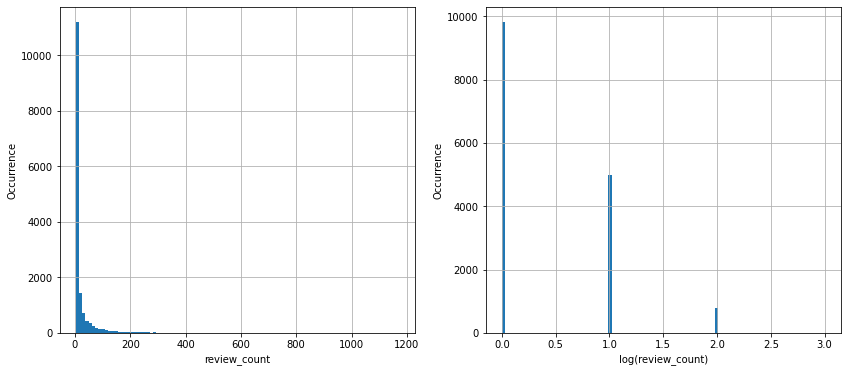

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
biz_df['review_count'].hist(ax=ax[0], bins=100)
ax[0].set_xlabel('review_count')
ax[0].set_ylabel('Occurrence')

biz_df['log_rev_cnt'].hist(ax=ax[1], bins=100)
ax[1].set_xlabel('log(review_count)')
ax[1].set_ylabel('Occurrence')

### Box-Cox 변환

##### 푸아송 분포: 단위시간 또는 공간 내에서 어떤 경우를 일어나는 경우 (빈도가 적고, 동시에 일어나지 않고, 전후 사건이 서로 영향을 주지 않을 때)
##### 특징: 평균값(기대값) 람다라고 하면, 분산도 람다 형태로!

In [18]:
from scipy import stats

fitted_data, fitted_lambda = stats.boxcox(biz_df['review_count'])
biz_df['box_rev_cnt'] = fitted_data

/Users/jhohunkoog/opt/anaconda3/envs/tester/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jhohunkoog/opt/anaconda3/envs/tester/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -0.5408563789457254


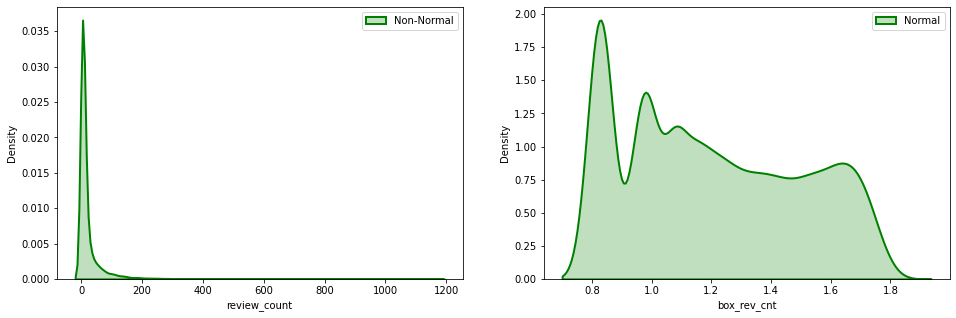

In [20]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(biz_df['review_count'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
ax[0].legend()

sns.distplot(biz_df['box_rev_cnt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
ax[1].legend()  
print('Lambda value used for Transformation:', fitted_lambda)

## 스케일링

In [21]:
# 데이터의 범위를 정하는 일
# 키: 160~190cm, 몸무게: 40~120kg, 허리둘레: 24~40인치, 건강체질 비교!
# 키, 몸무게, 허리둘레는 데이터의 값의 범위가 차이가 나니까 그대로 쓰면 어느 한쪽에 편중될 가능성이 높음!

In [22]:
from sklearn.preprocessing import MinMaxScaler # 최대-최소를 기준으로 0~1 사이의 값으로 나타낸 것!
from sklearn.preprocessing import StandardScaler # 표준 정규분포로 바꾸어 주는 것
from sklearn.preprocessing import Normalizer # 거리로 표현하는 방법
import sklearn.preprocessing as preprocess

#Min-Max
scaler = MinMaxScaler()
# 원래 스케일러들은 2차원 배열이지만 지금 피처 하나만 있는 1차원이라서 2차원처럼 변형한 것이다.
data = biz_df['review_count'].to_numpy().reshape(-1, 1) 
biz_df['min_max'] = scaler.fit_transform(data)
#Min-max scaling을 원하면 아래의 코드를 실행하면 된다.
#biz_df['min_max'] = preprocess.minmax_scale(biz_df['review_count'])
#Normalized
scaler = StandardScaler()
biz_df['normalized'] = scaler.fit_transform(data)
#L1 norm: 절대값을 취하는 일
scaler = Normalizer(norm='l1')
biz_df['l1_norm'] = Normalizer().fit_transform(data)
#L2 norm: 유클리디안 거리를 취하는 일
scaler = Normalizer(norm='l2')
biz_df['l2_norm'] = Normalizer().fit_transform(data)

In [23]:
# Normalizer / Regularizer
# Normalizer: 거리를 조정하는 일
# Regularizer: 데이터 자체를 잘라내거나 버릴 때 하는 일 (Outlier, Deep Learning에서 과적합 문제 등을 다룰 때)

Text(0.5, 1.0, 'L2 Normalize')

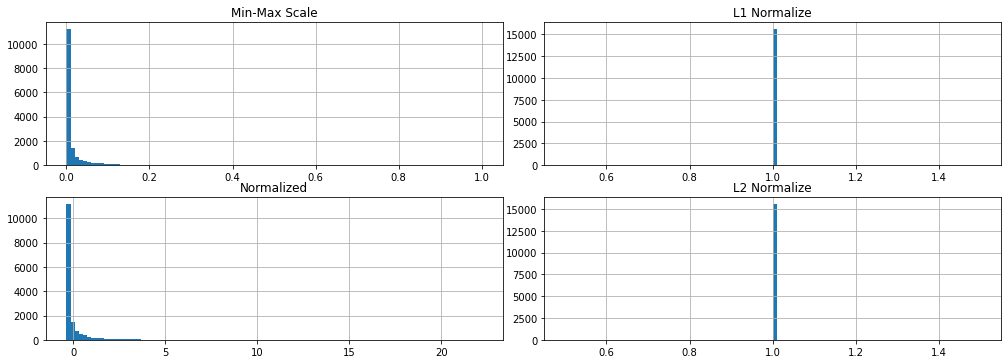

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(14, 5))
fig.tight_layout()
biz_df['min_max'].hist(ax=ax[0,0], bins=100)
ax[0, 0].set_title('Min-Max Scale')
biz_df['normalized'].hist(ax=ax[1,0], bins=100)
ax[1, 0].set_title('Normalized')
biz_df['l1_norm'].hist(ax=ax[0,1], bins=100)
ax[0, 1].set_title('L1 Normalize')
biz_df['l2_norm'].hist(ax=ax[1,1], bins=100)
ax[1, 1].set_title('L2 Normalize')

## 결측치 다루기

In [25]:
df = pd.read_excel('Data/med_data_actual.xlsx', index_col=0, engine='openpyxl') # 결측치가 포함된 데이터셋
df.head()

,학과,성별,A1,A2,A3,A4,A5,B1,B2,B3,...,B7,C1,C2,C3,C4,C5,C6,C7,Interest,Motive
Index,,,,,,,,,,,,,,,,,,,,,
0,의예과,여,2,2,1.0,2.0,2.0,NaN,3,3.0,...,2,2,4,1,3,2,2,1,2,1.0
1,치의예과,남,2,2,5.0,2.0,2.0,2.0,4,2.0,...,2,2,2,1,5,5,1,1,1,1.0
2,치의예과,여,2,3,5.0,4.0,3.0,2.0,3,4.0,...,2,3,3,3,3,3,3,3,3,2.0
3,치의예과,NaN,1,2,2.0,1.0,2.0,1.0,2,1.0,...,2,1,1,1,1,2,1,2,1,2.0
4,의예과,여,2,2,4.0,3.0,2.0,2.0,3,2.0,...,3,2,2,2,3,3,2,2,3,2.0


In [26]:
pd.isnull(df.iloc[3,1])

True

In [27]:
# 결측치가 있는 행 또는 열 제거하기
# axis=0이면 행 제거, axis=1이면 열 제거
df_drop_row = df.dropna(axis=0)
df_drop_col = df.dropna(axis=1)

print(df.shape, df_drop_row.shape, df_drop_col.shape)

(103, 23) (94, 23) (103, 15)


In [28]:
df_fillnum = df.fillna(100) #결측치를 100으로 채우십시오!
df_fillstr = df.fillna('dunno') #'dunno'로 채우십시오.
df_fill_dept = df['학과'].fillna('무소속') # 학과 컬럼에서 결측치를 '무소속'으로 채우십시오!
df_fill_0 = df.loc[:, 'A1':'Motive'].fillna(0) # 특정 컬럼의 범위에서 결측치를 숫자 0으로 채우십시오!

In [29]:
df_fill_dept.value_counts()

치의예과    59
의예과     39
의예과      4
무소속      1
Name: 학과, dtype: int64

In [30]:
df_fill_0.tail()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,B7,C1,C2,C3,C4,C5,C6,C7,Interest,Motive
Index,,,,,,,,,,,,,,,,,,,,,
98,3,2,2.0,2.0,2.0,4.0,2,2.0,2,2,...,2,3,3,3,2,2,3,3,3,1.0
99,5,1,5.0,3.0,1.0,2.0,5,3.0,1,3,...,1,1,1,2,5,5,2,1,2,1.0
100,2,2,5.0,2.0,2.0,2.0,4,3.0,2,3,...,2,2,2,2,4,4,2,2,2,1.0
101,1,1,1.0,1.0,1.0,1.0,3,3.0,1,1,...,1,1,1,1,5,5,1,1,1,1.0
102,2,2,4.0,1.0,1.0,2.0,4,2.0,1,2,...,2,3,2,2,5,5,2,3,3,1.0


In [31]:
df = df.replace({'': np.nan})#빈 문자열 NAN 값으로 바꾸기
#NAN 이 있는 행은 삭제, inplace=True를 선택하면 값을 반환하지 않아도 원래의 데이터프레임을 수정한다.
df.dropna(how='any', inplace=True) 
df = df.reset_index(drop = True) #인덱스를 0부터 차곡차곡 두는 방법이다.

In [32]:
# Interest 및 Motive 모두 중복되는 행이 있는지 확인한다.
df.duplicated(['Interest', 'Motive'])
# Interst 및 Motive 행이 중복되면 첫째 값만 살린다.
df.duplicated(['Interest', 'Motive'], keep='first')
# 중복되면 무조건 제거한다.
df.drop_duplicates(['Interest', 'Motive'])

,학과,성별,A1,A2,A3,A4,A5,B1,B2,B3,...,B7,C1,C2,C3,C4,C5,C6,C7,Interest,Motive
0,치의예과,남,2,2,5.0,2.0,2.0,2.0,4,2.0,...,2,2,2,1,5,5,1,1,1,1.0
1,치의예과,여,2,3,5.0,4.0,3.0,2.0,3,4.0,...,2,3,3,3,3,3,3,3,3,2.0
3,의예과,남,3,3,2.0,3.0,3.0,4.0,3,3.0,...,4,4,4,4,5,4,4,4,3,1.0
5,의예과,여,2,2,5.0,3.0,1.0,1.0,3,3.0,...,2,2,2,3,5,5,2,2,2,1.0
16,의예과,여,3,3,5.0,3.0,3.0,1.0,4,4.0,...,3,3,3,3,4,4,2,3,4,1.0
19,치의예과,남,1,2,2.0,3.0,2.0,4.0,5,4.0,...,3,2,2,1,2,4,4,5,3,4.0
22,치의예과,남,1,1,5.0,1.0,2.0,4.0,5,1.0,...,1,1,1,1,5,1,2,2,2,2.0
27,치의예과,남,1,1,2.0,2.0,1.0,1.0,2,3.0,...,1,3,2,3,2,1,1,2,1,4.0
33,치의예과,남,2,1,3.0,2.0,2.0,2.0,3,1.0,...,3,3,2,2,1,1,1,1,2,4.0
50,치의예과,남,5,5,5.0,5.0,5.0,5.0,5,5.0,...,5,5,5,5,5,5,5,5,5,1.0


## 기초 통계 익히기

In [33]:
df2 = pd.read_excel('Data/instruct_data.xlsx', index_col=0, engine='openpyxl')
df2.head()

,Class,Sex,Before,After,Later
Index,,,,,
2,1,F,2,2,4
3,1,M,3,3,2
4,1,M,3,3,5
5,1,M,2,2,5
6,1,F,2,2,5


## T-test
### 비교자 하는 집단의 평균값에 차이가 있는지 확인하는 방법
### 인과적 의미는 아니고 차이만 보는 것!

![nn](img/t_test.png)

In [34]:
import scipy

#대응표본 t검정
#p-value는 0.05 이하가 되어야 결과를 받아들일 수 있음!
result1 = scipy.stats.ttest_rel(df2[['After']], df2[['Before']])
#독립표본 t검정
result2 = scipy.stats.ttest_ind(df2[['After']], df2[['After']], equal_var=False) #equal_var: 등분산성 가정
print(result1, '\n', result2)

Ttest_relResult(statistic=array([-1.29919132]), pvalue=array([0.19950172])) 
 Ttest_indResult(statistic=array([0.]), pvalue=array([1.]))


## 회귀분석

![lr](img/lr_fig.png)

In [37]:
## 여러 개의 데이터가 있을 때, 원인이 되는 데이터 -> 결과가 되는 데이터
## 이 데이터들의 관계를 설명할 때 쓰는 방법
## 입력: x, y, z
## 출력: u
## 관계식: u = ax + by + cz (a, b, c는 상수)
## 인과적 관계를 의미함!

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split # 훈련 데이터와 시험 데이터를 나누는 함수

# 알콜 중독 여부를 나타내는 데이터셋
df = pd.read_excel('Data/student_alc.xlsx', engine='openpyxl')
selected = ['age', 'famrel', 'freetime', 'goout', 
            'Dalc', 'Walc', 'health', 'absences', 'G3']
df_reg = df[selected] # 데이터셋 중에서 일부 변수만 회귀분석을 위해 선택
x = df_reg[df_reg.columns [:-1]] # 마지막 열은 성적이므로 종속변수라서 제외
y = df_reg['G3'] # 종속변수
# Train 및 test 데이터 구분
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, random_state=321)
print (x_train.shape, x_test.shape)

(276, 8) (119, 8)


In [41]:
%precision 3 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) # 훈련 데이터로 학습하기
r_square = lr.score(x_test, y_test)
print('R-squared value: ', r_square) #결정계수
print('coefficients of x: ', lr.coef_) #기울기
print('intercept: ', lr.intercept_) #절편

R-squared value:  0.023269474076747954
coefficients of x:  [-0.689  0.2    0.3   -0.65  -0.254  0.263 -0.269  0.052]
intercept:  22.488052227380795


/Users/jhohunkoog/opt/anaconda3/envs/tester/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jhohunkoog/opt/anaconda3/envs/tester/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


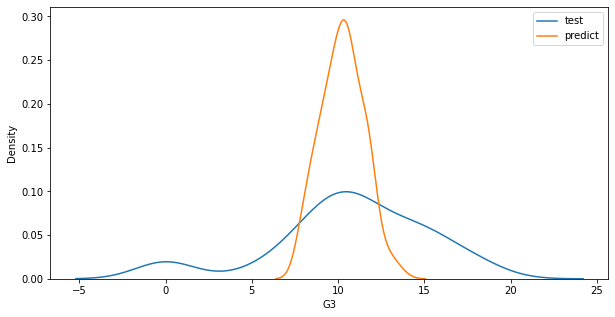

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr.predict(x_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label='test')
ax2 = sns.distplot(y_pred, hist=False, label='predict', ax=ax1)
plt.legend()
plt.show()
plt.close()

## 다항회귀분석

In [43]:
%precision 3
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train) # 학습 데이터를 2차항으로 변형
pr = LinearRegression()
pr.fit(x_train_poly, y_train)
x_test_poly = poly.fit_transform(x_test) # 학습 데이터 종속변수를 2차항으로 변형
r_square = pr.score(x_test_poly, y_test)
print(r_square, pr.coef_, pr.intercept_)

-0.10585154318161627 [-4.083e-12  3.741e+00  2.814e+00  6.456e+00  1.029e+00 -8.295e+00
  2.188e+00 -2.261e+00 -3.402e-01 -8.401e-02 -2.369e-01 -4.110e-01
  8.085e-02  4.371e-01 -1.012e-01 -5.052e-02  3.693e-02  3.753e-02
 -1.720e-02  2.227e-01  2.381e-01 -5.033e-01  4.457e-01 -2.261e-02
  1.295e-01 -9.018e-02 -4.201e-02 -2.598e-01  2.415e-01 -9.237e-03
 -5.595e-01 -3.907e-01  6.940e-01 -3.697e-01  1.864e-02  1.952e-01
  3.521e-01 -1.073e-01 -6.872e-02 -1.588e-01  1.773e-01 -2.203e-02
  1.877e-01  3.287e-02 -4.204e-03] -24.85662643194534


/Users/jhohunkoog/opt/anaconda3/envs/tester/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jhohunkoog/opt/anaconda3/envs/tester/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


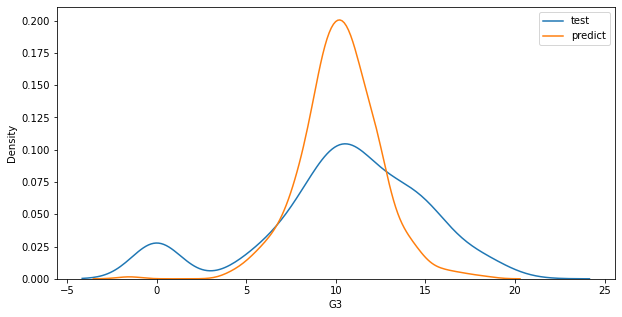

In [44]:
x_ploy = poly.fit_transform(x)
y_pred = pr.predict(x_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label='test')
ax2 = sns.distplot(y_pred, hist=False, label='predict', ax=ax1)
plt.legend()
plt.show()
plt.close()

## ANOVA
### 셋 이상의 집단을 비교할 때, 분산의 차이를 보는 것!

In [45]:
import pandas as pd

# 뉴욕주의 렌트비 데이터셋
df = pd.read_excel('nyc_2019.xlsx', index_col=0, engine='openpyxl')
selected = ['neighbourhood_group', 'price']
df_rent = df[selected] # 일부 컬럼만 선택하기
df_rent.columns = ['group', 'price'] # 컬럼명 변경(이름이 너무 길어서)
x = df_rent[df_rent.columns[:-1]] # 마지막 열은 성적이므로 종속변수라서 제외
y = df_rent['price'] # 종속변수

<AxesSubplot:xlabel='group', ylabel='price'>

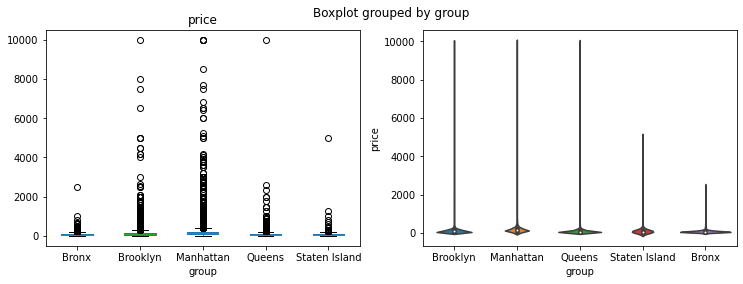

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

fig.tight_layout()
df_rent.boxplot(column='price', by='group', grid=False, ax=ax[0])
sns.violinplot(x='group', y='price', data=df_rent, ax=ax[1])

In [47]:
!pip install statsmodels

In [48]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'price ~ C(group)'
lm = ols(formula, df_rent).fit()
print(anova_lm(lm))

               df        sum_sq       mean_sq           F         PR(>F)
C(group)      4.0  7.959096e+07  1.989774e+07  354.994839  7.723724e-302
Residual  48890.0  2.740323e+09  5.605078e+04         NaN            NaN
